In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement_table.date).order_by(measurement_table.date.desc()).first()
print(most_recent_date[0])

2017-08-23


Text(0, 0.5, 'Inches')

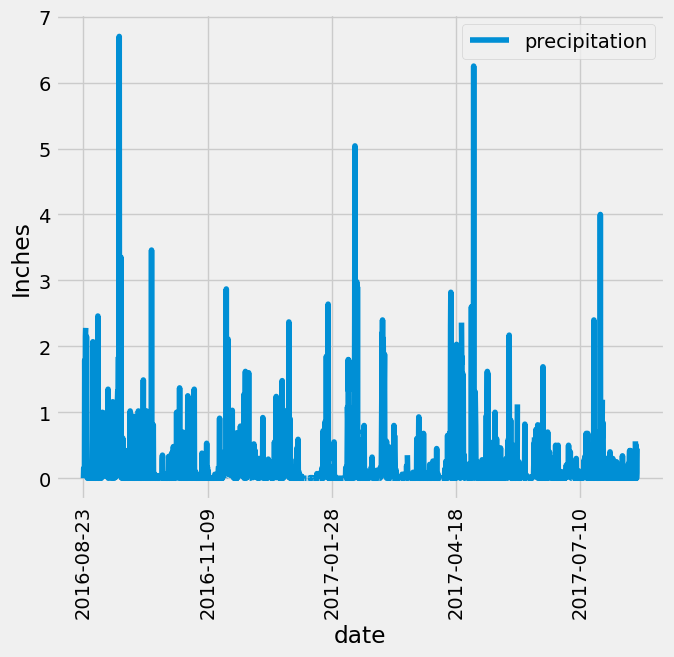

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date[0],"%Y-%m-%d") - dt.timedelta(days=366)

# Perform a query to retrieve the data and precipitation scores
# This query returns the last year of precipitation data ordered by date
precipitation_data = session.query(measurement_table.date, measurement_table.prcp).order_by(measurement_table.date).filter(measurement_table.date >= one_year_ago).all()
precipitation_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Make an empty list and add each row of data to the list
listy = []
for row in precipitation_data:
    listy.append(row)

# make the list into a dataframe
precipitation_df = pd.DataFrame(listy, columns = ['date', 'precipitation'])
precipitation_df

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x = 'date', y = 'precipitation', rot = 90, figsize = (7,6))
plt.ylabel('Inches')

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(station_table.station).count()
print(f'The number of stations is {number_of_stations}')

The number of stations is 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activity = session.query(measurement_table.station, func.count(measurement_table.station)).group_by(measurement_table.station).\
    order_by(func.count(measurement_table.station).desc()).all()
activity
most_active = session.query(measurement_table.station).group_by(measurement_table.station).\
    order_by(func.count(measurement_table.station).desc()).first()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(measurement_table.tobs)).filter(measurement_table.station == most_active[0]).all()
print(f'The lowest temp recorded is {low_temp[0][0]}')
max_temp = session.query(func.max(measurement_table.tobs)).filter(measurement_table.station == most_active[0]).all()
print(f'The highest temp recorded is {max_temp[0][0]}')
avg_temp = session.query(func.avg(measurement_table.tobs)).filter(measurement_table.station == most_active[0]).all()
print(f'The average temp is {avg_temp[0][0]}')

The lowest temp recorded is 54.0
The highest temp recorded is 85.0
The average temp is 71.66378066378067


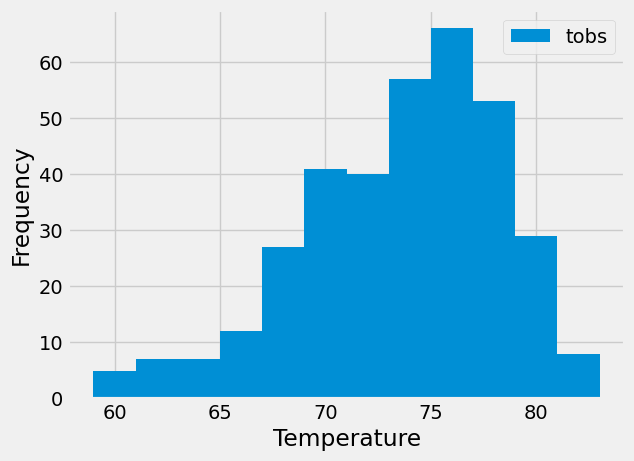

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
statresponse = session.query(measurement_table.date, measurement_table.tobs).order_by(measurement_table.date).filter(measurement_table.date >= one_year_ago).\
    filter(measurement_table.station == most_active[0]).all()
last_12_months_data = []
for row in statresponse:
    last_12_months_data.append(row)
stat_df = pd.DataFrame(last_12_months_data, columns = ['date', 'tobs'])

plt.hist(stat_df['tobs'], bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()